In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
def NLM(ic, nt):
    wc, buc, bsc = ic
    
    wlist = [wc]
    bulist = [buc]
    bslist = [bsc]
    
    # euler
    if bsc > buc:
        wf = wc + bsc*dt
    else:
        wf = wc + buc*dt
        
    buf = buc - (Nu**2)*wc*dt
    bsf = bsc - (Ns**2)*wc*dt
    
    wlist.append(wf)
    bulist.append(buf)
    bslist.append(bsf)
    
    wp, bup, bsp = wc, buc, bsc
    wc, buc, bsc = wf, buf, bsf
    

    for t in range(1, nt-1):
        if bsc > buc:
            wf = wp + bsc*dt*2
        else:
            wf = wp + buc*dt*2

        buf = bup - (Nu**2)*wc*dt*2
        bsf = bsp - (Ns**2)*wc*dt*2
        
        wlist.append(wf)
        bulist.append(buf)
        bslist.append(bsf)
        
        wp, bup, bsp = wc, buc, bsc
        wc, buc, bsc = wf, buf, bsf
        
    return np.array(wlist), np.array(bulist), np.array(bslist) 

In [3]:
def TLM(ic, traj, nt):
    w, bu, bs = traj
    wc_tl, buc_tl, bsc_tl = ic

    wlist_tl = [wc_tl]
    bulist_tl = [buc_tl]
    bslist_tl = [bsc_tl]
    
    if bs[0] > bu[0]:
        wf_tl = wc_tl + bsc_tl*dt
    else:
        wf_tl = wc_tl + buc_tl*dt
        
    buf_tl = buc_tl - (Nu**2)*wc_tl*dt
    bsf_tl = bsc_tl - (Ns**2)*wc_tl*dt
        
    wlist_tl.append(wf_tl)
    bulist_tl.append(buf_tl)
    bslist_tl.append(bsf_tl)
    wp_tl, bup_tl, bsp_tl = wc_tl, buc_tl, bsc_tl
    wc_tl, buc_tl, bsc_tl = wf_tl, buf_tl, bsf_tl
    
    for t in range(1, nt-1):
        if bs[t] > bu[t]:
            wf_tl = wp_tl + bsc_tl*dt*2  
        else:
            wf_tl = wp_tl + buc_tl*dt*2  
            
        buf_tl = bup_tl - Nu**2 * wc_tl * dt*2
        bsf_tl = bsp_tl - Ns**2 * wc_tl * dt*2
        
        wlist_tl.append(wf_tl)
        bulist_tl.append(buf_tl)
        bslist_tl.append(bsf_tl)
        
        wp_tl, bup_tl, bsp_tl = wc_tl, buc_tl, bsc_tl
        wc_tl, buc_tl, bsc_tl = wf_tl, buf_tl, bsf_tl

    return np.array(wlist_tl), np.array(bulist_tl), np.array(bslist_tl) 

In [4]:
def ADJ(adj_forcing, traj, nt):
    w, bu, bs = traj
    wf_ad, bsf_ad, buf_ad = adj_forcing
    wlist_ad = [wf_ad]
    bslist_ad = [bsf_ad]
    bulist_ad = [buf_ad]
    
    # current
    wc_ad, bsc_ad, buc_ad = 0, 0, 0
    # past
    wp_ad, bsp_ad, bup_ad = 0, 0, 0
    
    for t in np.arange(nt-2, 0, -1):
        bsp_ad = bsp_ad + bsf_ad
        # wc_ad = wc_ad - Ns**2*bsf_ad * dt*2
        # bsf_ad = 0
            
        bup_ad = bup_ad + buf_ad
        # wc_ad = wc_ad - Nu**2*buf_ad * dt*2
        wc_ad = wc_ad - Ns**2*bsf_ad * dt*2 - Nu**2*buf_ad * dt*2
        # bsf_ad = 0
        
        wp_ad = wp_ad + wf_ad
        if bs[t] > bu[t]:
            # wp_ad = wp_ad + wf_ad
            buc_ad = buc_ad + 2*Nu*wf_ad * dt*2
            # wf_ad = 0
        else:
            # wp_ad = wp_ad + wf_ad
            bsc_ad = bsc_ad + 2*Ns*wf_ad * dt*2
            # wf_ad = 0
        wlist_ad.append(wc_ad)
        bulist_ad.append(buc_ad)
        bslist_ad.append(bsc_ad)
        
        wf_ad, buf_ad, bsf_ad = wc_ad, buc_ad, bsc_ad
        wc_ad, buc_ad, bsc_ad = wp_ad, bup_ad, bsp_ad
        wp_ad, bup_ad, bsp_ad = 0, 0, 0
        
    print(t, len(wlist_ad))
    t = 0
    wp_ad = wp_ad - Ns**2 * bsc_ad * dt - Nu**2 * buc_ad * dt
    bsp_ad = bsp_ad + bsc_ad
    bup_ad = bup_ad + buc_ad


    if bu[t] > bs[t]:
        bsp_ad = bsp_ad + Ns * wc_ad * dt
    else:
        bup_ad = bup_ad + Nu * wc_ad * dt

    wp_ad = wp_ad + wc_ad

#         awf = 0

    wlist_ad.append(wp_ad)
    bulist_ad.append(bup_ad)
    bslist_ad.append(bsp_ad)
    
    return np.array(wlist_ad[::-1]), np.array(bulist_ad[::-1]), np.array(bslist_ad[::-1])

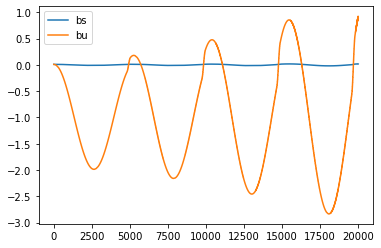

In [6]:
nt = 20000
dt = 0.1
Nu = 0.12
Ns = Nu/10

ic_nlm = (0.1, 0.5, 0.15)
ic_tlm = (0.01, 0.01, 0.01)

traj_nlm = NLM(ic_nlm, nt)
w_nlm, bu_nlm, bs_nlm = traj_nlm
w_tl, bu_tl, bs_tl = TLM(ic_tlm, traj_nlm, nt)

plt.plot(bs_tl, label='bs')
plt.plot(bu_tl, label='bu')
plt.legend()

1 19999


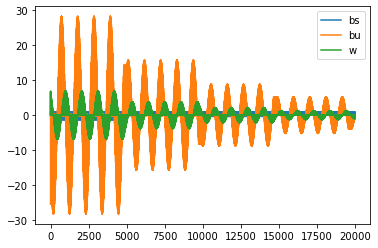

In [7]:
ic_adj = (w_tl[-1], bu_tl[-1], bs_tl[-1])
w_ad, bu_ad, bs_ad = ADJ(ic_adj, traj_nlm, nt)

plt.plot(bs_ad, label='bs')
plt.plot(bu_ad, label='bu')
plt.plot(w_ad, label='w')
plt.legend()

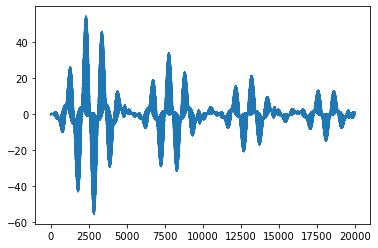

In [8]:
dR = w_tl*w_ad + bu_tl*bu_ad + bs_tl*bs_ad
plt.plot(dR)